# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [94]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [95]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [96]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [1,3,5]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,13265,1196,4221,6404,507,1788
2,9413,8259,5126,666,1795,1451


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:** 
_Fresh_ Are fruits and vegatables, also meat. 
_Milk_ Are products that have as base ingrediant milk in some case, like cheese and yogurt
_Grocery_ Are Products that are produced in factories and have a long period to be consumed
_Detergents Paper_ Is used for washing clothers
_Delicatessen_ Food of high quality or of some rare availability

The choosen customer with the index 1 seems to be have a near double demand on Milk products than the mean. Also I see a higher demand in grovery than the mean and a higher demand on Detergents Paper. 
I would "predict" to be some company creating and selling ice cream. They need a regular delivery as milk needs to fast transformed.

The choosen customer with the index 3 seems to have average demand on fresh products, but a lot lower milk demand. In terms of Grocery, it also reflects an mean demand. They don't order a lot of Detergens Paper and an mean in Delicatessen. 
I would "predict" to be some company as wholesale retailerss. They need less Detergents Paper, so they don't need to wash that much like a restaurant.

The choosen cusomter with the index 5 have a less than mean demand in Fresh products, an also high demand in milk. The Grocery demand is half of the mean like the demand for frozen products. The detergents paper demand is higher than the mean and finally the delicatessen demand is higher then the mean. I would "predict" that this company focus on a market sell, as the don't use a lot of frozen products.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [97]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# using: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html
new_data = data.drop(labels = ['Detergents_Paper'], axis=1)
new_data.head()

,Fresh,Milk,Grocery,Frozen,Delicatessen
0,12669,9656,7561,214,1338
1,7057,9810,9568,1762,1776
2,6353,8808,7684,2405,7844
3,13265,1196,4221,6404,1788
4,22615,5410,7198,3915,5185


Changes made regarding first review: Now iterating 1000 times to reduce the influence of previosly set random state value and averaging the r^2 score. Also changes from _Delicatessen_ to _Detergents Paper_ as this is a lot better feature to separate the data.

In [98]:
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [99]:
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25)

In [100]:
# TODO: Create a decision tree regressor and fit it to the training set
scores = []

for _i in range(0, 999):
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores.append(score)
    
print("{:.4}".format(np.average(scores)))

0.5617


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** I tried to predict the `Detergents_Paper` feature. The R^2 score was ~ 0.8, Regarding the provided hint, the model is doing quite well. As this feature have a high R^2 Score, it can be quite easy predicted by other features and have not a high relevance to identify the spending habits of the customers.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

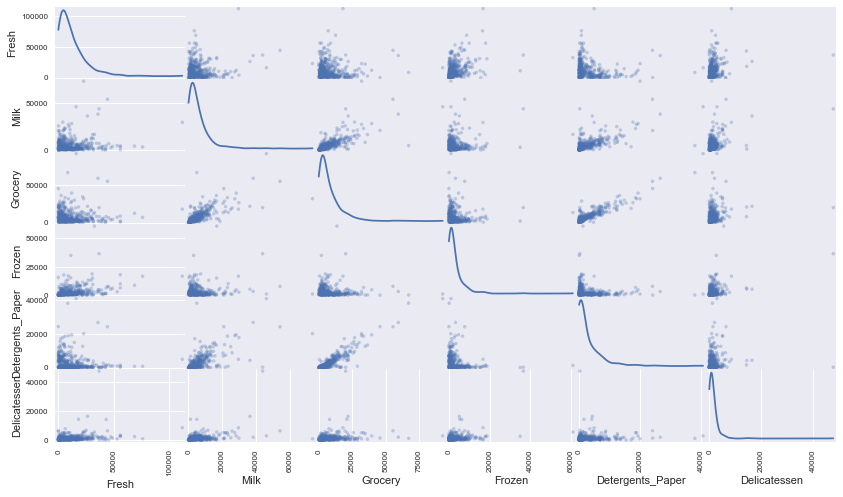

In [101]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

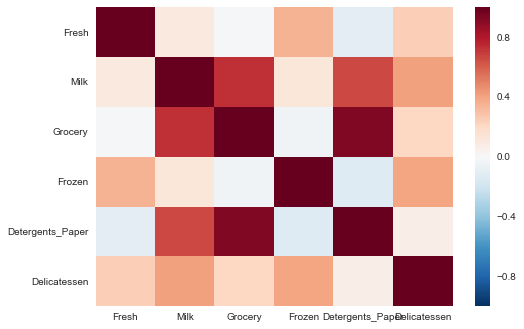

In [102]:
import seaborn as sns; sns.set()
sns.heatmap(data.corr())

As you can see in the generated heatmap above, there is a high positive correlation between _Grocery_ and _Detergents Paper_ . Values of _Grocery_ above 30000 and Values above 20000 for _Detergents Paper_ seem to be outliers in the dataset. Most of the datapoints are in this area. I did not predicted the correct correlation of both features before the first review. The high diagonal inside the scattering plot also indicates this high relation. This is even more visible after the data is rescaled in the above part. All references to the same category are very right skewed with a high mode and than falling quite fast again. More insides can again be gathered after the data got rescaled in the later parts.

Also there is a positive correlation between _Milk_ and _Detergents Paper_. Values of _Milk_ above 20000 and Values above 20000 for _Detergents Paper_ seem to be outlier in the dataset. Most of the datapoints have a lower value. 

Between _Frozen_ and _Fresh_ and also between _Frozen_ and _Delicatessen_ there is lower positive relation. There is no negativ correlation in the provided features.

Compared to my selected feature _Detergents Paper_ from Implementation 1, this indeed shows that based on the _Grocery_ the feature _Detergents Paper_ can be predicted and confirm the low relevance of this feature to extract the customer spending habits.  



## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\Users\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


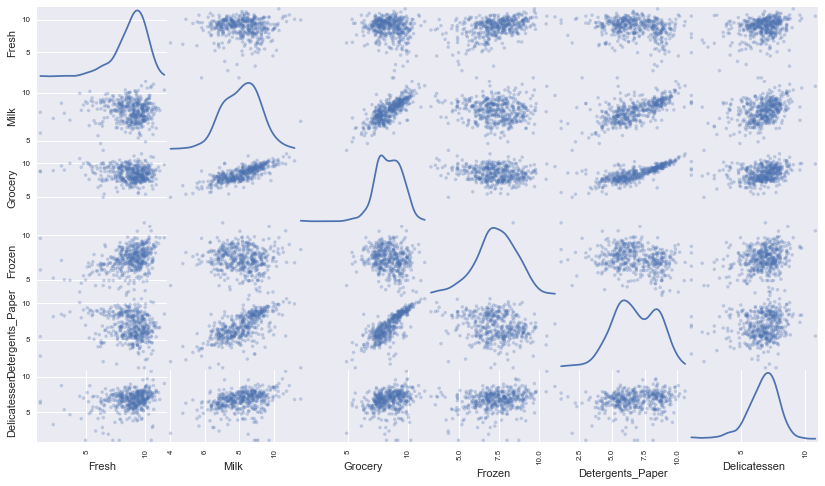

In [103]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [104]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
2,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [105]:
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []
outlier_count = {}

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    print("Q1: {}, Q3: {}, step: {}".format(Q1, Q3, step))
    outliers_by_feature = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    for index in outliers_by_feature.index:
        outliers.append(index)
        outlier_count[index] = outlier_count.get(index, 0) + 1
    display(outliers_by_feature)
    

Data points considered outliers for the feature 'Fresh':
Q1: 8.048058702214819, Q3: 9.73706394795268, step: 2.533507868606793


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':
Q1: 7.334981240042021, Q3: 8.880480088587671, step: 2.318248272818475


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':
Q1: 7.67461620137308, Q3: 9.27385367723784, step: 2.3988562137971394


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':
Q1: 6.609677749172153, Q3: 8.175896083178294, step: 2.3493275010092116


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':
Q1: 5.548101424791306, Q3: 8.274340598750195, step: 4.0893587609383335


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':
Q1: 6.011874656932535, Q3: 7.506728426547161, step: 2.2422806544219394


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [106]:
print(outlier_count)
# make sure they are uniq
outliers = np.unique(outliers)

{65: 2, 66: 2, 81: 1, 95: 1, 96: 1, 128: 2, 171: 1, 193: 1, 218: 1, 304: 1, 305: 1, 338: 1, 353: 1, 355: 1, 357: 1, 412: 1, 86: 1, 98: 1, 154: 3, 356: 1, 75: 2, 38: 1, 57: 1, 145: 1, 175: 1, 264: 1, 325: 1, 420: 1, 429: 1, 439: 1, 161: 1, 109: 1, 137: 1, 142: 1, 183: 1, 184: 1, 187: 1, 203: 1, 233: 1, 285: 1, 289: 1, 343: 1}


In [107]:
print("All outliers: {}".format(outliers))
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

All outliers: [ 38  57  65  66  75  81  86  95  96  98 109 128 137 142 145 154 161 171
 175 183 184 187 193 203 218 233 264 285 289 304 305 325 338 343 353 355
 356 357 412 420 429 439]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** Following data points are considered outliers for more than once as outliers:


In [108]:
for k, v in outlier_count.items():
    if v >= 2:
        display(log_data.iloc[k])

Fresh                4.442651
Milk                 9.950323
Grocery             10.732651
Frozen               3.583519
Detergents_Paper    10.095388
Delicatessen         7.260523
Name: 65, dtype: float64

Fresh               2.197225
Milk                7.335634
Grocery             8.911530
Frozen              5.164786
Detergents_Paper    8.151333
Delicatessen        3.295837
Name: 66, dtype: float64

Fresh               4.941642
Milk                9.087834
Grocery             8.248791
Frozen              4.955827
Detergents_Paper    6.967909
Delicatessen        1.098612
Name: 128, dtype: float64

Fresh               6.432940
Milk                4.007333
Grocery             4.919981
Frozen              4.317488
Detergents_Paper    1.945910
Delicatessen        2.079442
Name: 154, dtype: float64

Fresh               9.923192
Milk                7.036148
Grocery             1.098612
Frozen              8.390949
Detergents_Paper    1.098612
Delicatessen        6.882437
Name: 75, dtype: float64

In [109]:
len(outlier_count.keys())

42

In [110]:
len(data)

440

As there are in total _440_ datapoints and _42_ of them appear to be an outlier, and _5_ as outlier in several features, I would consider removing the _42_ total outliers to increase the clustering accuracy for k-means as k-means can't handle outliers well.  I would consider a consistent clustering more imporant to get the correct customers for each segment, instead clustering them "somehow" using also the outlier data. Inside the sample dataset, the outliers are not used.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [111]:
from sklearn.decomposition import PCA

In [112]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=len(good_data.columns)).fit(good_data)

In [113]:
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

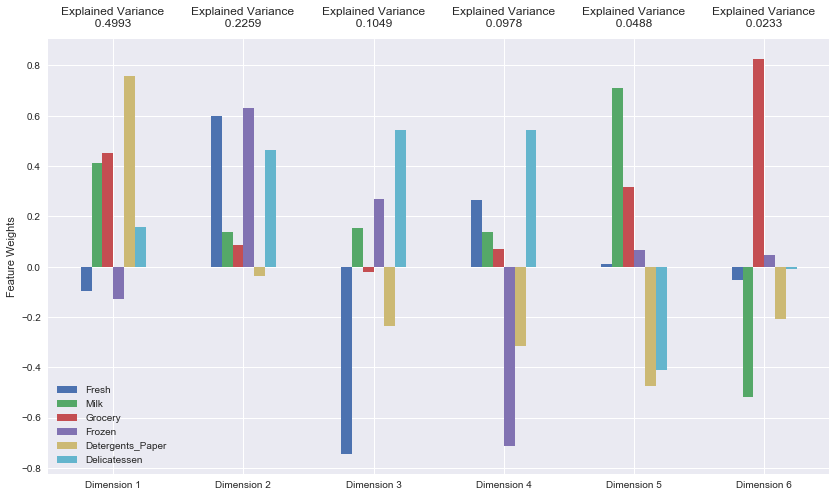

In [114]:
# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:** Used: https://ro-che.info/articles/2017-12-11-pca-explained-variance for "total" variance

#### Total variance

In [115]:
pca_results['Explained Variance'].cumsum() # Based on a hint from the first review

Dimension 1    0.4993
Dimension 2    0.7252
Dimension 3    0.8301
Dimension 4    0.9279
Dimension 5    0.9767
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

As I don't get it after the second review, I looked around and now my answer is based on: https://github.com/darkdreamingdan/mlnd-customer-segments/blob/master/customer_segments.ipynb

* The total variance of the first two princical components: *0.7252* (0.4993 + 0.2259)

* The total variance of the first four princical components is *0.9279* (0.4993 + 0.2259 + 0.1049 + 0.0978)

#### Variance of first four pricipal components

In [116]:
for i in [1,2,3,4]:
    value =  pca_results.loc[['Dimension {}'.format(i)]]['Explained Variance']
    print("Explained Variance for Dimension {} is {:.4}".format(i, float(value)))

Explained Variance for Dimension 1 is 0.4993
Explained Variance for Dimension 2 is 0.2259
Explained Variance for Dimension 3 is 0.1049
Explained Variance for Dimension 4 is 0.0978


In [117]:
display(pca_results)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.1280,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.6300,-0.0376,0.4634
Dimension 3,0.1049,-0.7452,0.1544,-0.0204,0.2670,-0.2349,0.5422
Dimension 4,0.0978,0.2667,0.1375,0.0710,-0.7133,-0.3157,0.5445
Dimension 5,0.0488,0.0114,0.7083,0.3168,0.0671,-0.4729,-0.4120
Dimension 6,0.0233,-0.0543,-0.5177,0.8267,0.0471,-0.2080,-0.0094


#### Inspect

### Dimension 1
The explained variance is 0.4993. The features _Milk_, _Grocery_, and _Detergents Paper_ are positive weighted features. _Fresh_ and _frozen_ are nearly neutral weighted features. This first customer group seems to represent a hospital, as they use a lot of Detergents Paper for washing purpose and prefair already prepared meals and milk. I assume they spend an average value, as hospitals prefair cheep meals, but have to order quite a lot for there patients.

### Dimension 2
The explained variance is 0.2259. The features _Fresh_, _Frozen_, and _Delicatessen_ are positive weighted features. _Milk_ and _Grocery_ are slightly positive weighted features. _Detergents Paper_ is a neutral weighted feature. This group seems to represent a typical restaurant, as a lot of fresh ingredients are bought and also Frozen ingredients that can otherwise not resist for a longer period of time without cooling like fruits. Also the high feature weight of Delicatessen is an indicator for my theory. This customer group require a regular delivery, as they have a high usage of Fresh ingredients. They should pay for a more regular delivery.


### Dimension 3
The explained variance is 0.1049. The features _Delicatessen_ and _Frozen_ are positive weighted features. _Milk_ is a slightly positive feature. _Grocery_ is a neutral feature. _Detergents Paper_ and _Delicatessen_ are negative weighted features. As this group is not using _Fresh_, I assume this group woun't pay for additional delivery.

### Dimsension 4
The explained variance is 0.0978. The features _Delicatessen_ and _Fresh_ are high positive weighted features. _Milk_ and _Grocery_ are neutral weighted features. _Detergents Paper_ and _Frozen_ are negativ weighted features. I would also assume that this group of custeroms can be interisted in a more regular delivery, as the are using _Frozen_ ingredients only in small amounts.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [118]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.8820,0.4617,0.2764,0.1055,0.0958,-0.2093
1,-0.9986,1.3694,0.2854,-0.3997,-0.6781,0.6194
2,1.1335,-0.1257,-0.1789,0.8899,0.0844,-0.5694


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [119]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

In [120]:
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

In [121]:
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

In [122]:
# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [123]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.8820,0.4617
1,-0.9986,1.3694
2,1.1335,-0.1257


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

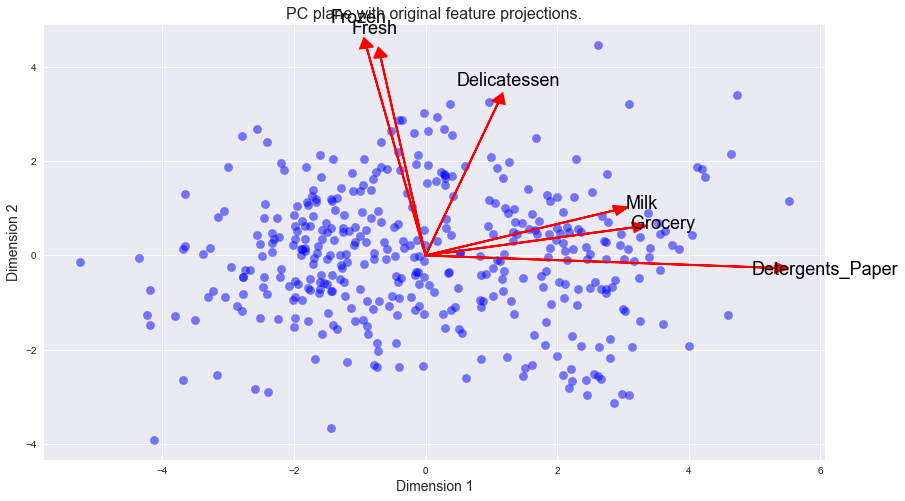

In [124]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

** Answer: **
The feature _Detergents Paper_ is the most strong feature in the first component, as it is closly parallel to the x axis. The feature _Fresh_ is the most strong feature in the second component, as it is closly parallel to the y axis. Compared to the pca_result, both features created ina combination the most area of different points, thats why I agree with the result obtained from the pca. 

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
## K-Means Clustering advantages
Answer based on: https://www.quora.com/What-are-the-advantages-of-K-Means-clustering
* Hard Clustering, every point belongs to a cluster.
* Easy to implement
* a point can change the cluster after some iterations to improve the clustering
* Works greate when the data is spharical
* Useful for pre-clustering

## Gaussian Mixture Model
Answer based on:https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm
* Soft Clustering, can handle outliers
* Finds more eliptic shaped clusters
* Probability based, so mixed membership is possible

## Decision
I would try the gaussian mixture model, as I assume to be more hidden features that are not present in the feature set, also the data don't feels very spharical, as the drawn vectors in the BiPlot spread quite a lot.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [125]:
# using http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
from sklearn.mixture import GaussianMixture

# using: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
from sklearn.metrics import silhouette_score
from time import time

In [126]:
r = []

for components in range(2, 10):
    start = time()
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=components, random_state=42).fit(reduced_data)  
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    # TODO: Find the cluster centers
    centers = clusterer.means_
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)


    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    r.append({'components': components, 'score': score, 'time' : (time() - start)})
    
r_df = pd.DataFrame(r)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

In [127]:
r_df.sort_values('score', ascending=False)[:5]

,components,score,time
0,2,0.447412,0.010999
1,3,0.361194,0.030998
4,6,0.340604,0.029999
5,7,0.329661,0.040553
6,8,0.329122,0.028970


The Best Score is using two components, with a calculation time of 0.013 s.

In [128]:
best_components = int(r_df.sort_values('score', ascending=False)[:1]['components'])

In [129]:
# Recalculate for correct plotting in the next section
# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = GaussianMixture(n_components=best_components, random_state=42).fit(reduced_data)  
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)
# TODO: Find the cluster centers
centers = clusterer.means_
# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)


# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

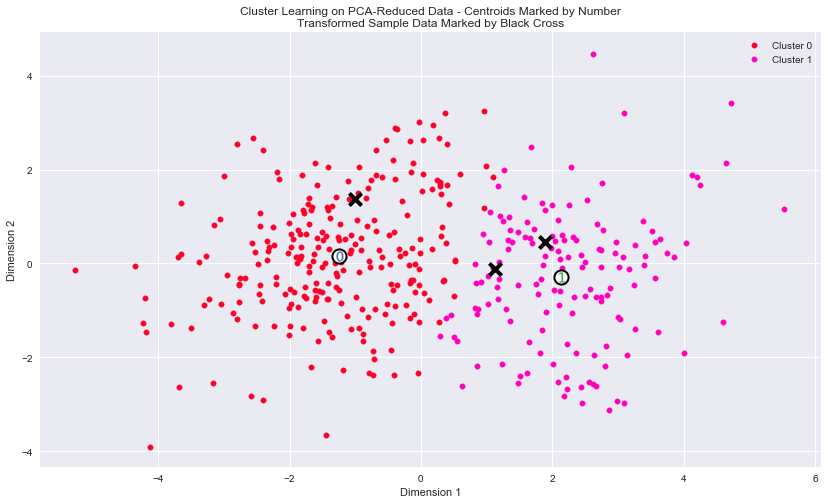

In [130]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [131]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

In [132]:
# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9468.0,2067.0,2624.0,2196.0,343.0,799.0
Segment 1,5174.0,7776.0,11581.0,1068.0,4536.0,1101.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:** As there are only two segments, its hard to find somehow "establishments" that represent the customer segments.

# Segment 0
12000 - 9468 = 2532 below mean for _Fresh_

5796 - 2067 = 3729 below mean for _Milk_

7951 - 2624 = 5327 below mean for _Grocery_

4854 - 2196 = 2658 below mean for _Frozen_

2881 - 343 = 2538 below mean for _Detergents Paper_

1524 - 799 = 725 below mean for _Delicatessen_

I would name this segment "bad running business" or "small business" as every value is below the mean and theirfor indicates a not good running business.

# Segment 1
12000 - 5174 = 6826 below mean for _Fresh_

5796 - 7776 = 1980 **above** mean for _Milk_

7951 - 11581 = 3630 **above** mean for _Grocery_

4854 - 1068 = 3786 below mean for _Frozen_

2881 - 4536 =  1655 **above** mean for _Detergents Paper_

1524 - 1101 = 423 below mean for _Delicatessen_

I would name this segment "good running business" or just "big business" as three of the feature are above the mean and theirfore indicating a good running business.

In [133]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [134]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:** The selected Customer with the index 1 (sample point 0) and 5 (sample point 2) are belonging to the "big business" cluster. The customer with the index 3 (sample point 1) belongs to the "small business" cluster.

In [135]:
data.loc[[1,3,5]]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
1,7057,9810,9568,1762,3293,1776
3,13265,1196,4221,6404,507,1788
5,9413,8259,5126,666,1795,1451


I think the result is consistent, as _Fresh_ don't seem to be a really relevant feature for separating into this two groups. As the custommer with index _1_ and _3_ have a _Milk_ consumption **above** 1980 of the mean, the are moved into this group. 

As the usage of _Detergents Paper_ is below the mean, this correctly grouped the client to the "small business" cluster.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

_ Changes after First review_

I assume the given extracted segments react differently to the change request. 

#### Extract acceptance rate by segment 0
Yes, the wholesale distributor can use our customer segments to check how each segment react to this change. Lets start with the customers belonging to segment 0: 95% of this customers will not be part of our test. For the rest 5% of this customers, we propose the change from a 5 days a week delivery to a three week delivery. We choose 5% to have a statistical representative amount. This is our first A/B that we are running. This will return in some acceptance rate of the new delivery scheudule, lets say 55% of the subselected 5% of the customers in segment 0.

#### Extract acceptance rate by segment 1
Now we do a second A/B Test. Instead of now locking at the customers belonging to the segment 0, we now take a look at 5% of the customers in the segment 1. We also propose this customers the change from a 5 days a week delivery to a 3 days a week delivery. We now also have a given acceptance rate by this group after accepting or rejecting the change request. Lets assume the acceptance rate is only 15%.

#### Comparing
We now compare the acceptance rate of both A/B Tests. As the acceptance rate is a lot higher and above 50% by the customers belonging to the segment 0, this groups wins the A/B Tests, and the change can be rolled out to every customer in this group.

Segment 1 indeed have a very low acceptence rate and I would not suggest rolling out this change to every customer in this segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** He can either use the generated unsupervised model and generate a prediction on it, or try a supervised learning technic that adds the segment data as feature to the dataset and than generate a new model that uses a combined data to create a probably more precise prediction. The target varible would be the segment of this new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

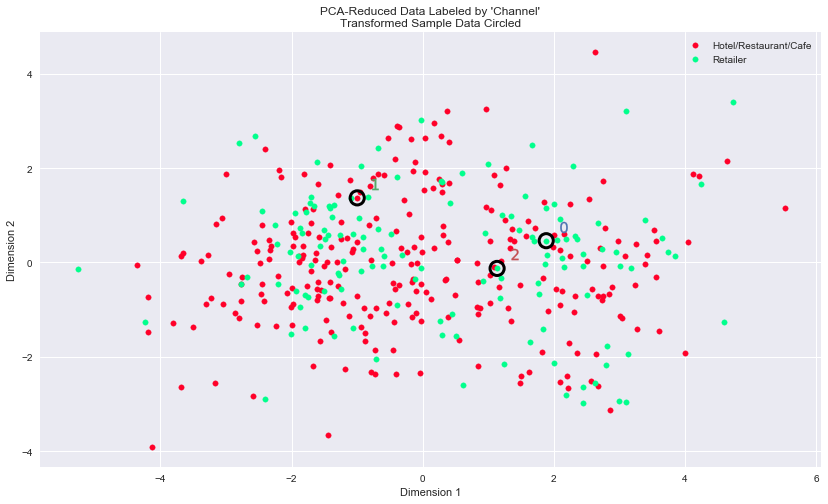

In [136]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, [], pca_samples)

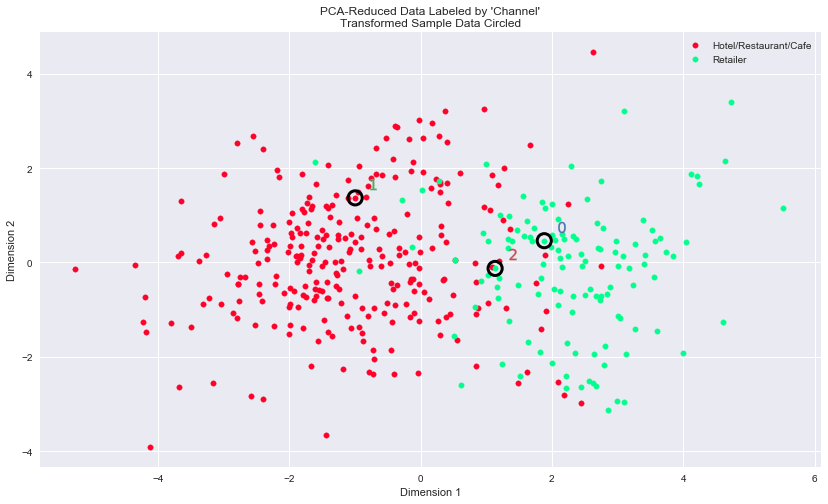

In [137]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
* The number of clusters was correcly calculated
* The clustering algorithm cutted the data in a more "pure" left and right side as the original data
* No, in both clusters are datapoints that are in a "wrong" group, so no "pure" segment can be created.
* I would consider the wrong clustered datapoints in the clustering algorithm still as outliers.
* I cleaned up the list of outliers, and the visual representation got even more mixed, so the removement of the outliers was good, but there seems to still be some of them in the data.

I also reveive a good final accuracy (based on the first review hint)

In [138]:
channel_labels = pd.read_csv("customers.csv")["Channel"]
channel_labels = channel_labels.drop(channel_labels.index[outliers]).reset_index(drop = True) - 1
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(channel_labels,preds)

In [139]:
accuracy

0.90201005025125625

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.